In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from src import utils as u
from imblearn.over_sampling import RandomOverSampler

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load X_train
X_train_prep = u.deserialize_data(
    "../data/processed/X_train_prep.pkl"
)

# Load y_train
y_train_prep = u.deserialize_data(
    "../data/processed/y_train_prep.pkl"
)

In [4]:
ros = RandomOverSampler(random_state=42)

In [5]:
# Transform y_train Series into DataFrame
y_train_df = y_train_prep.to_frame(name="loan_status")

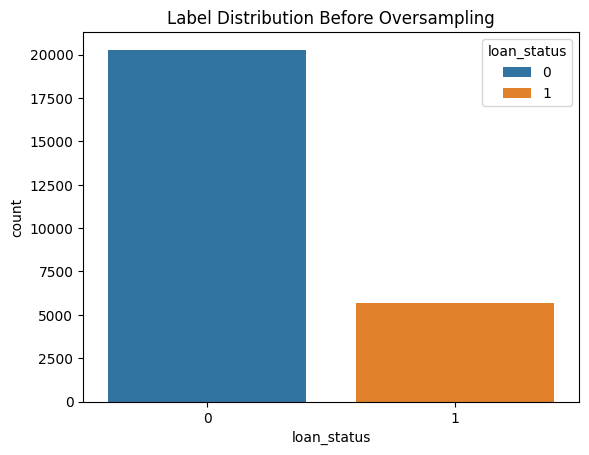

In [6]:
# Graph before oversampling
sns.countplot(
    data=y_train_df,
    x="loan_status",
    hue="loan_status"
)

plt.title("Label Distribution Before Oversampling")
plt.show()

In [7]:
# Oversampling
X_train_ros, y_train_ros = ros.fit_resample(
    X_train_prep,
    y_train_prep
)

print(X_train_prep.shape)
print(X_train_ros.shape)

(25968, 26)
(40582, 26)


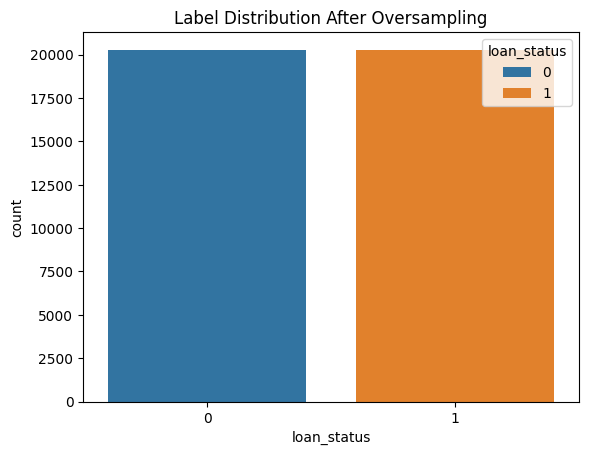

In [8]:
# Graph after oversampling
y_train_ros_df = pd.DataFrame(
    y_train_ros,
    columns=["loan_status"]
)


sns.countplot(
    data=y_train_ros_df,
    x="loan_status",
    hue="loan_status"
)

plt.title("Label Distribution After Oversampling")
plt.show()

In [9]:
# Serialize data after oversampling
u.serialize_data(
    X_train_ros,
    "../data/processed/X_train_ros.pkl"
)

u.serialize_data(
    y_train_ros,
    "../data/processed/y_train_ros.pkl"
)